In [14]:
import pandas as pd
import seaborn as sns

In [3]:
normal = pd.read_csv('mRNA_luad_normal_selected_features_with_stage.txt').drop("Unnamed: 0", axis = 1)

In [4]:
cancer = pd.read_csv('mRNA_luad_cancer_selected_features_with_stage.txt').drop("Unnamed: 0", axis = 1)

In [5]:
normal_cancer = normal.append(cancer)

In [6]:
normal_cancer['PATIENT_ID'] = normal_cancer['SAMPLE_ID'].str.rsplit("-", expand=True, n=1)[[0]]

In [7]:
normal_cancer

,SAMPLE_ID,TP53,LRP1B,KRAS,PCLO,KEAP1,CDKN2A,CDKN2B,PTPRD,FAT4,...,DNAJB1,TAL2,VHL,RRAS,SUFU,YPEL5,CNBP,CANCER,AJCC_PATHOLOGIC_TUMOR_STAGE,PATIENT_ID
0,TCGA-38-4625-11,-0.0328,1.2230,-1.2616,-2.0080,1.4570,0.8833,-2.1534,-0.5443,-1.5755,...,-0.3553,-2.1687,-1.5253,1.5613,0.0836,1.4791,2.0326,0,0.0,TCGA-38-4625
1,TCGA-38-4626-11,-0.3309,0.5500,0.6824,-1.8427,1.1378,0.4636,-2.0383,-1.8345,-2.1362,...,0.2497,0.2379,-0.4337,0.1050,-1.2382,2.0749,1.2748,0,0.0,TCGA-38-4626
2,TCGA-38-4627-11,-0.0017,0.3543,-0.1434,-3.5007,1.2647,0.6788,-0.3808,1.3830,0.5451,...,-0.3801,-2.1687,-2.6167,1.7112,-0.5564,1.8686,1.8477,0,0.0,TCGA-38-4627
3,TCGA-38-4632-11,1.2735,-0.4444,-0.1481,-2.2348,1.9394,-1.8756,-3.1896,-1.9351,-2.4071,...,-0.1954,-2.1687,-0.4749,-0.7769,-0.6861,1.0412,1.7934,0,0.0,TCGA-38-4632
4,TCGA-44-2655-11,1.3820,0.2180,-1.3814,-0.5510,1.3887,0.6200,1.3674,1.0689,1.2550,...,0.5827,-2.1687,-0.5336,0.4745,1.1813,-0.7891,-0.0243,0,0.0,TCGA-44-2655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,TCGA-NJ-A55O-01,-0.0089,-2.1999,1.1136,-0.0474,-0.1597,1.5058,-2.1470,-2.3509,-2.1853,...,-2.1529,-0.6728,-0.0157,-1.2628,-0.6578,-0.8579,-2.3605,1,2.0,TCGA-NJ-A55O
506,TCGA-NJ-A55R-01,1.6511,1.9012,1.8702,2.4002,1.9488,1.9428,-3.3456,-3.5516,-3.3692,...,-3.2145,2.2473,1.3141,-4.8252,-1.6706,-1.3332,-1.2619,1,1.0,TCGA-NJ-A55R
507,TCGA-NJ-A7XG-01,3.5794,-0.7869,0.7416,-0.1560,1.2164,-3.6816,-10.4258,-3.4336,-2.4874,...,-1.5515,-0.9416,0.9324,-2.8283,-0.8667,-0.4355,-1.6755,1,3.0,TCGA-NJ-A7XG
508,TCGA-O1-A52J-01,-4.9061,1.3277,-4.1285,2.1975,-0.1347,6.3964,-3.7371,-0.4136,-0.5574,...,-1.9357,0.7286,1.7147,-3.4491,-0.4291,-2.5904,-3.1545,1,1.0,TCGA-O1-A52J


In [8]:
patient_info = pd.read_csv('data_clinical_patient_clean.csv').drop("Unnamed: 0", axis = 1)

In [9]:
patient_info

,PATIENT_ID,SUBTYPE,CANCER_TYPE_ACRONYM,OTHER_PATIENT_ID,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,...,WEIGHT,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS
0,TCGA-05-4244,LUAD,LUAD,34040b83-7e8a-4264-a551-b16621843e28,70.0,Male,STAGE IV,6TH,0.0,-25752.0,...,NaN,Yes,0:LIVING,0.000000,0:ALIVE OR DEAD TUMOR FREE,0.000000,NaN,NaN,0:CENSORED,0.000000
1,TCGA-05-4249,LUAD,LUAD,4addf05f-3668-4b3f-a17f-c0227329ca52,67.0,Male,STAGE IB,6TH,1523.0,-24532.0,...,NaN,Yes,0:LIVING,50.070684,0:ALIVE OR DEAD TUMOR FREE,50.070684,NaN,NaN,0:CENSORED,50.070684
2,TCGA-05-4250,LUAD,LUAD,f98ecd8a-b878-4f53-b911-20cd8e17281c,79.0,Female,STAGE IIIA,6TH,NaN,-29068.0,...,NaN,Yes,1:DECEASED,3.978039,NaN,3.978039,NaN,NaN,0:CENSORED,3.978039
3,TCGA-05-4382,LUAD,LUAD,3434b91a-c05f-460f-a078-7b1bb6e7085d,68.0,Male,STAGE IB,6TH,607.0,-24868.0,...,NaN,Yes,0:LIVING,19.955946,0:ALIVE OR DEAD TUMOR FREE,19.955946,1:Recurred/Progressed,10.980702,1:PROGRESSION,10.980702
4,TCGA-05-4384,LUAD,LUAD,9a50e7e4-831d-489f-87d2-979e987561cc,66.0,Male,STAGE IIIA,6TH,426.0,-24411.0,...,NaN,Yes,0:LIVING,14.005326,0:ALIVE OR DEAD TUMOR FREE,14.005326,NaN,NaN,1:PROGRESSION,6.016372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,TCGA-17-Z045,NaN,LUAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
562,TCGA-17-Z031,NaN,LUAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
563,TCGA-17-Z049,NaN,LUAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
564,TCGA-17-Z060,NaN,LUAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
patient_info_genes = patient_info.merge(normal_cancer, on='PATIENT_ID')

In [11]:
patient_info_genes

,PATIENT_ID,SUBTYPE,CANCER_TYPE_ACRONYM,OTHER_PATIENT_ID,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE_x,AJCC_STAGING_EDITION,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,...,MYD88,DNAJB1,TAL2,VHL,RRAS,SUFU,YPEL5,CNBP,CANCER,AJCC_PATHOLOGIC_TUMOR_STAGE_y
0,TCGA-05-4244,LUAD,LUAD,34040b83-7e8a-4264-a551-b16621843e28,70.0,Male,STAGE IV,6TH,0.0,-25752.0,...,-0.6545,0.7177,-0.4452,0.7018,-3.8643,-1.0992,0.0804,-1.6262,1,4.0
1,TCGA-05-4249,LUAD,LUAD,4addf05f-3668-4b3f-a17f-c0227329ca52,67.0,Male,STAGE IB,6TH,1523.0,-24532.0,...,-0.0951,-1.1713,-2.1687,0.9997,-5.5307,1.8450,0.1412,-1.3173,1,1.0
2,TCGA-05-4250,LUAD,LUAD,f98ecd8a-b878-4f53-b911-20cd8e17281c,79.0,Female,STAGE IIIA,6TH,NaN,-29068.0,...,-0.9910,0.9927,1.0133,0.2920,-2.5057,-0.3163,-0.3269,0.2893,1,3.0
3,TCGA-05-4382,LUAD,LUAD,3434b91a-c05f-460f-a078-7b1bb6e7085d,68.0,Male,STAGE IB,6TH,607.0,-24868.0,...,0.6844,-1.9892,0.0170,0.9279,-1.5677,0.7067,-1.6269,-0.4259,1,1.0
4,TCGA-05-4384,LUAD,LUAD,9a50e7e4-831d-489f-87d2-979e987561cc,66.0,Male,STAGE IIIA,6TH,426.0,-24411.0,...,-0.8842,-2.9432,-2.1687,1.5310,-4.4192,1.0284,-0.4190,-0.3444,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,TCGA-NJ-A55O,LUAD,LUAD,8AB8C4BA-311E-41D0-85EA-A0245ACA1BDD,56.0,Female,STAGE IIA,7TH,13.0,-20628.0,...,-0.7893,-2.1529,-0.6728,-0.0157,-1.2628,-0.6578,-0.8579,-2.3605,1,2.0
563,TCGA-NJ-A55R,LUAD,LUAD,7C7D777B-BF00-4C24-97FC-922580D5605F,67.0,Male,STAGE IA,7TH,603.0,-24738.0,...,-3.8378,-3.2145,2.2473,1.3141,-4.8252,-1.6706,-1.3332,-1.2619,1,1.0
564,TCGA-NJ-A7XG,LUAD,LUAD,01E9888D-B5B9-48F1-8BA6-8A89AF108A04,49.0,Male,STAGE IIIA,7TH,617.0,-18127.0,...,-1.4952,-1.5515,-0.9416,0.9324,-2.8283,-0.8667,-0.4355,-1.6755,1,3.0
565,TCGA-O1-A52J,LUAD,LUAD,42432463-8E92-4F25-B72A-F03953527AA5,74.0,Female,STAGE IA,6TH,NaN,-27223.0,...,-1.5607,-1.9357,0.7286,1.7147,-3.4491,-0.4291,-2.5904,-3.1545,1,1.0


In [34]:
patient_info_genes.to_csv('patient_info_genes.csv', index=False)

In [29]:
# Plots with Top 15 Important Oncogenes in Tumor Staging

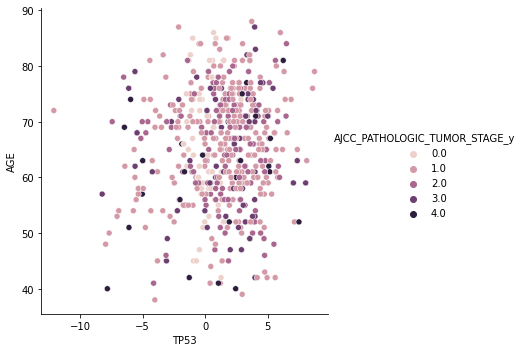

In [30]:
sns.relplot(x="TP53", y="AGE", hue='AJCC_PATHOLOGIC_TUMOR_STAGE_y', data=patient_info_genes)

In [ ]:
sns.relplot(x="TP53", y="AGE", hue='AJCC_PATHOLOGIC_TUMOR_STAGE_y', data=patient_info_genes)

In [ ]:
sns.relplot(x="TP53", y="AGE", hue='AJCC_PATHOLOGIC_TUMOR_STAGE_y', data=patient_info_genes)

In [ ]:
# Plots with Top 8 Important Oncogenes in Cancer Diagnosis

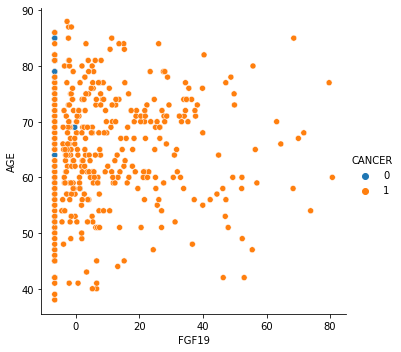

In [20]:
sns.relplot(x="FGF19", y="AGE", hue='CANCER', data=patient_info_genes);

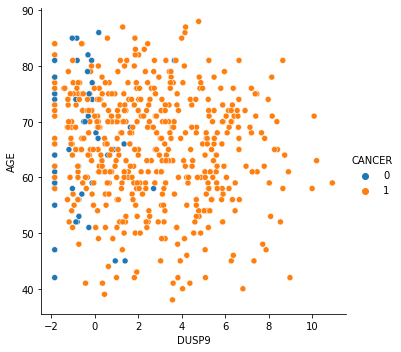

In [21]:
sns.relplot(x="DUSP9", y="AGE", hue='CANCER', data=patient_info_genes);

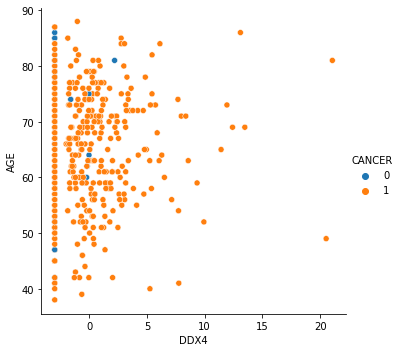

In [22]:
sns.relplot(x="DDX4", y="AGE", hue='CANCER', data=patient_info_genes);

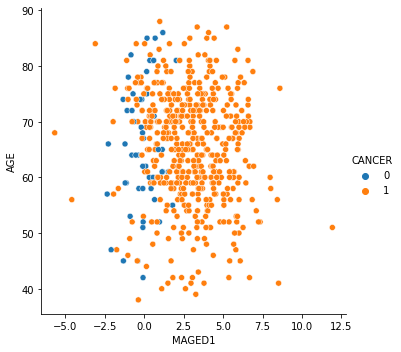

In [23]:
sns.relplot(x="MAGED1", y="AGE", hue='CANCER', data=patient_info_genes);

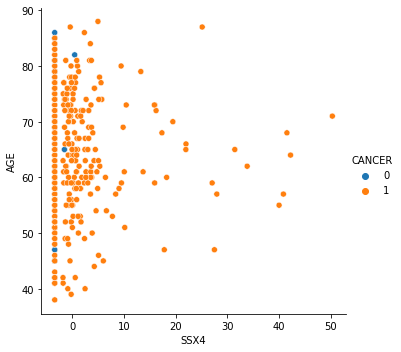

In [24]:
sns.relplot(x="MAGED1", y="AGE", hue='CANCER', data=patient_info_genes);

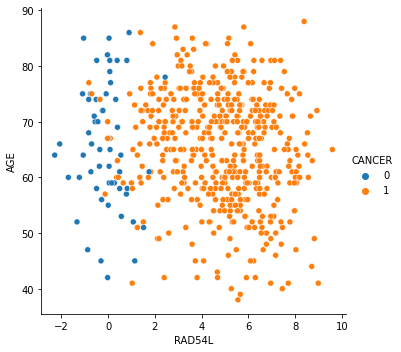

In [25]:
sns.relplot(x="RAD54L", y="AGE", hue='CANCER', data=patient_info_genes);

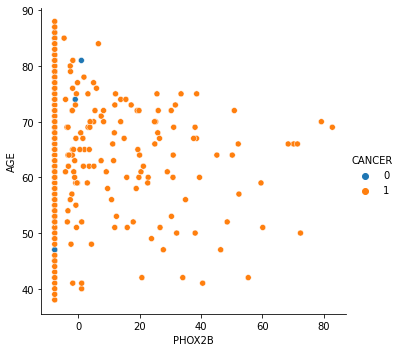

In [26]:
sns.relplot(x="PHOX2B", y="AGE", hue='CANCER', data=patient_info_genes);

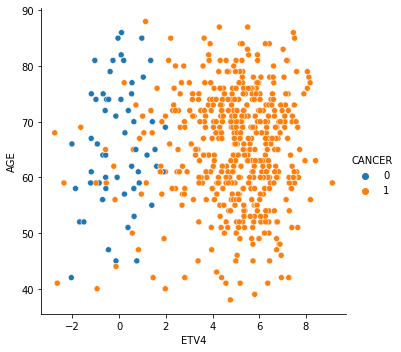

In [27]:
sns.relplot(x="ETV4", y="AGE", hue='CANCER', data=patient_info_genes);